In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

import time
np.random.seed(42)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

/Users/benjaminnew/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/benjaminnew/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
X_train_tfidf = pd.read_csv('../Data/tfidf_train_X.csv' )
X_test_tfidf = pd.read_csv('../Data/tfidf_test_X.csv')
y_train_tfidf = pd.read_csv('../Data/y_train.csv', header = None)
y_test_tfidf = pd.read_csv('../Data/y_test.csv' ,header = None)

In [16]:
y_train_tfidf[0].values


array([1, 0, 1, ..., 0, 0, 1])

In [6]:
SVD =  TruncatedSVD(n_components=100)
svd_matrix = SVD.fit_transform(X_train_tfidf)
svd_matrix.shape

(1674, 100)

Text(0.5,1,'Explained variance by component')

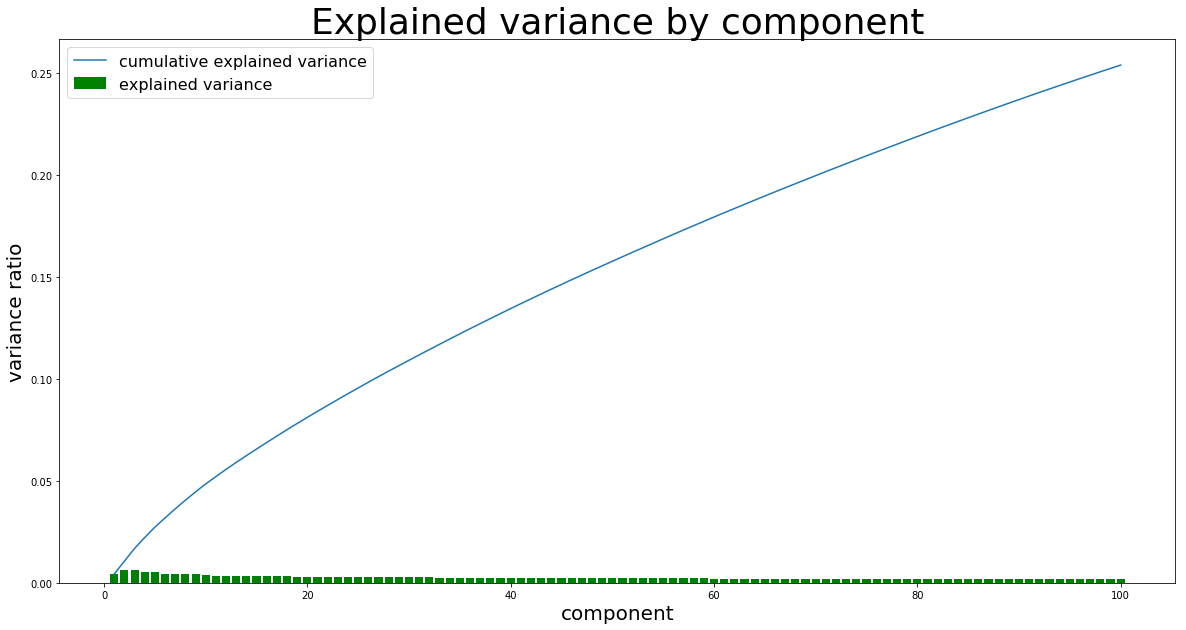

In [7]:
fig = plt.figure(figsize=(20,10))
plt.bar(np.array(range(100))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(100))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend(fontsize=16)
plt.xlabel('component', fontsize=20)
plt.ylabel('variance ratio', fontsize=20)
plt.title('Explained variance by component', fontsize=36)

In [8]:
component_names = ["component_"+str(i+1) for i in range(100)]
svd_df = pd.DataFrame(svd_matrix,
                      columns=component_names)

In [9]:
loadings = pd.DataFrame(SVD.components_,
                        index=component_names,
                        columns=X_train_tfidf.columns).T

In [10]:
loadings['abs_component_1'] = np.abs(loadings.component_1)
loadings['abs_component_2'] = np.abs(loadings.component_2)


In [11]:
loadings.sort_values('abs_component_1',ascending=False).head(20)[['component_1']]

,component_1
market,0.299472
just,0.148783
trading,0.146152
like,0.132532
buy,0.129632
know,0.124679
new,0.120149
time,0.111947
good,0.111453
company,0.108321


In [12]:
loadings.sort_values('abs_component_2',ascending=False).head(20)[['component_2']]

,component_2
blockchain,0.754884
based,0.143086
ibm,0.138307
patents,0.137385
alibaba,0.137122
bitcoin,0.135657
market,-0.119651
ethereum,0.112490
new,0.087843
launches,0.087563


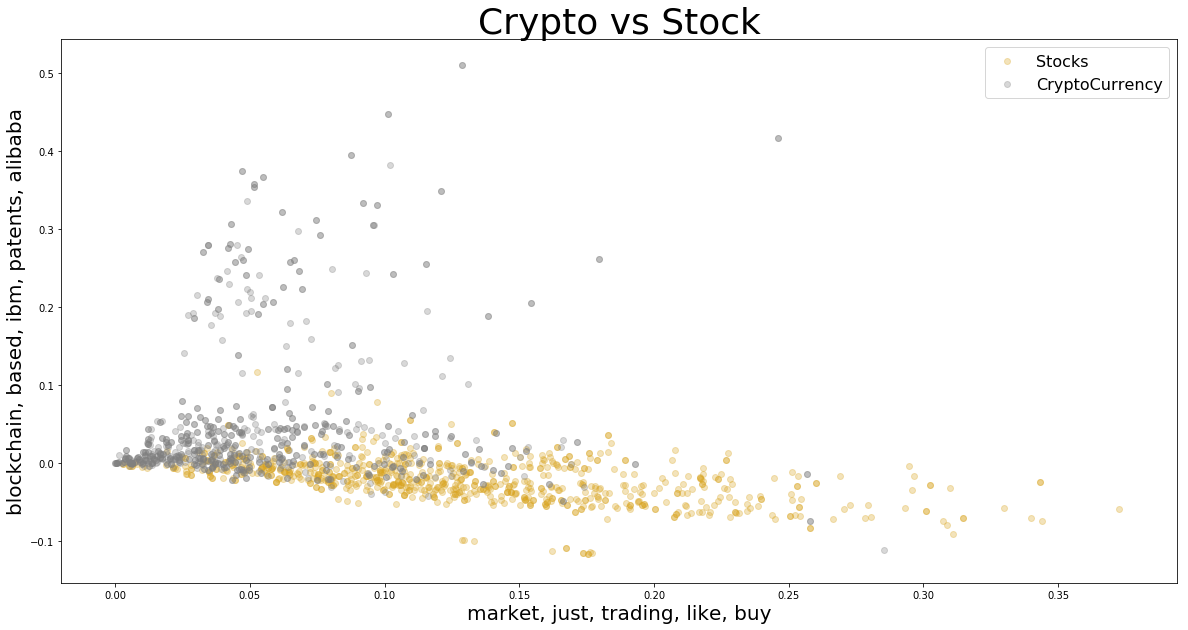

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(svd_df.component_1[y_train_tfidf[0].values==1], svd_df.component_2[y_train_tfidf[0].values==1], c='goldenrod', alpha=.3)
plt.scatter(svd_df.component_1[y_train_tfidf[0].values==0], svd_df.component_2[y_train_tfidf[0].values==0], c='grey', alpha=.3)
plt.xlabel(f"{', '.join(loadings.sort_values('abs_component_1',ascending=False).head(5)[['component_1']].index)}",
          fontsize=20)
plt.ylabel(f"{', '.join(loadings.sort_values('abs_component_2',ascending=False).head(5)[['component_2']].index)}",
          fontsize=20)
plt.title('Crypto vs Stock', fontsize=36)
plt.legend(['Stocks', 'CryptoCurrency'], fontsize=16)